In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
bajaj = pd.read_csv('Bajaj-2006-2010 - Sheet1.csv')
chola = pd.read_csv('CholaFin-2006-2010 - Sheet1.csv')
hdfc = pd.read_csv('HDFC Bank-2006-2010 - Sheet1.csv')
sbi = pd.read_csv('SBI-2006-2010 - Sheet1.csv')

In [48]:
bajaj['Date'] = pd.to_datetime(bajaj['Date'], infer_datetime_format=True)
bajaj['Date'] = pd.to_datetime(bajaj['Date']).dt.date

chola['Date'] = pd.to_datetime(chola['Date'], infer_datetime_format=True)
chola['Date'] = pd.to_datetime(chola['Date']).dt.date

hdfc['Date'] = pd.to_datetime(hdfc['Date'], infer_datetime_format=True)
hdfc['Date'] = pd.to_datetime(hdfc['Date']).dt.date

sbi['Date'] = pd.to_datetime(sbi['Date'], infer_datetime_format=True)
sbi['Date'] = pd.to_datetime(sbi['Date']).dt.date

In [49]:
bajaj = bajaj.set_index('Date')
chola = chola.set_index('Date')
hdfc = hdfc.set_index('Date')
sbi = sbi.set_index('Date')

In [50]:
bajaj.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,39.74,41.26,39.45,41.10,18678
2006-01-03,41.56,41.56,40.19,40.72,19522
2006-01-04,40.29,41.10,40.29,40.58,14762
2006-01-05,41.09,41.28,40.15,40.29,6974
2006-01-06,41.05,41.19,40.00,40.08,18440


In [51]:
chola.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,37.78,41.16,37.78,41.16,60105
2006-01-03,44.60,45.28,42.01,45.28,203255
2006-01-04,46.80,47.55,44.00,45.55,290172
2006-01-05,45.20,47.42,45.03,45.44,199907
2006-01-06,45.40,45.84,43.50,44.04,59390


In [52]:
hdfc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,70.88,72.00,70.70,71.35,268552
2006-01-03,68.00,71.80,68.00,71.33,128279
2006-01-04,72.00,73.51,71.40,73.21,536992
2006-01-05,73.20,74.30,72.53,73.95,385350
2006-01-06,74.00,77.50,73.00,76.90,861686


In [53]:
sbi.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-02,86.09,86.58,85.11,85.37,2004095
2006-01-03,85.67,86.32,85.47,86.04,1647614
2006-01-04,86.39,87.08,86.39,86.60,1832406
2006-01-05,86.94,89.19,86.72,88.80,4017009
2006-01-06,88.77,89.62,87.85,88.69,2249976


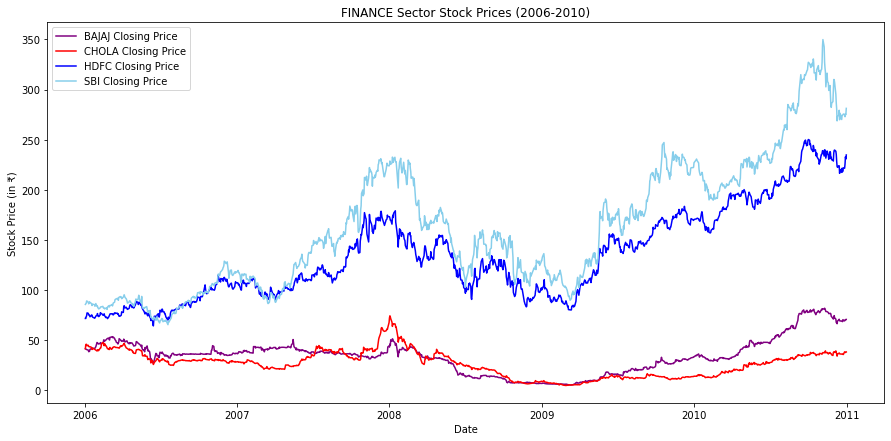

In [54]:
plt.figure(figsize=(15,7))
bajaj['Close'].plot(label='BAJAJ Closing Price', color = 'purple')
chola['Close'].plot(label='CHOLA Closing Price', color = 'red')
hdfc['Close'].plot(label='HDFC Closing Price', color = 'blue')
sbi['Close'].plot(label='SBI Closing Price', color ='skyblue')
plt.title("FINANCE Sector Stock Prices (2006-2010)")
plt.xlabel("Date")
plt.ylabel("Stock Price (in ₹)")
plt.legend()

Text(0, 0.5, 'Volume Traded')

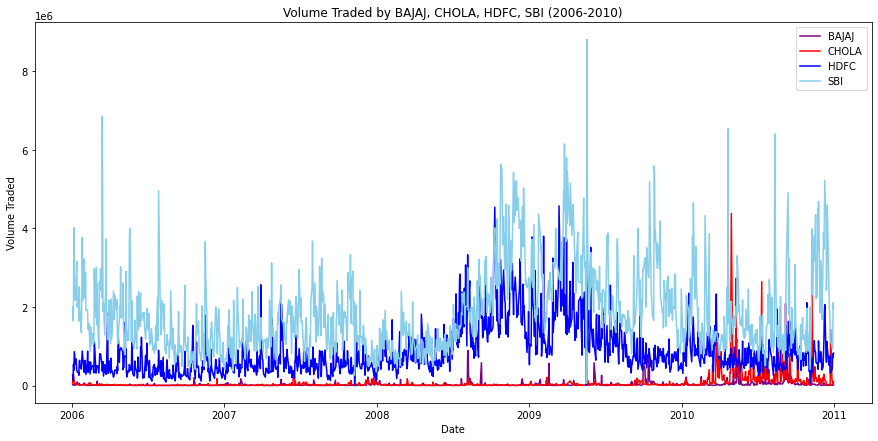

In [55]:
plt.figure(figsize=(15,7))
bajaj['Volume'].plot(label='BAJAJ', color = 'purple')
chola['Volume'].plot(label='CHOLA', color = 'red')
hdfc['Volume'].plot(label='HDFC', color = 'blue')
sbi['Volume'].plot(label='SBI', color ='skyblue')
plt.title("Volume Traded by BAJAJ, CHOLA, HDFC, SBI (2006-2010)")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume Traded')

In [56]:
sbi.iloc[[sbi['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-05-19,164.8,184.38,150.0,175.4,8802496


In [57]:
hdfc.iloc[[hdfc['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-05-19,139.2,149.9,120.63,141.18,4965348


In [58]:
!pip install mpl_finance


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
bajaj['Total Traded'] = bajaj['Open'] * bajaj['Volume']
chola['Total Traded'] = chola['Open'] * chola['Volume']
hdfc['Total Traded'] = hdfc['Open'] * hdfc['Volume']
sbi['Total Traded'] = sbi['Open'] * sbi['Volume']

Text(0.5, 1.0, 'Market Capitalisation of BAJAJ, CHOLA, HDFC, SBI (2006-2010)')

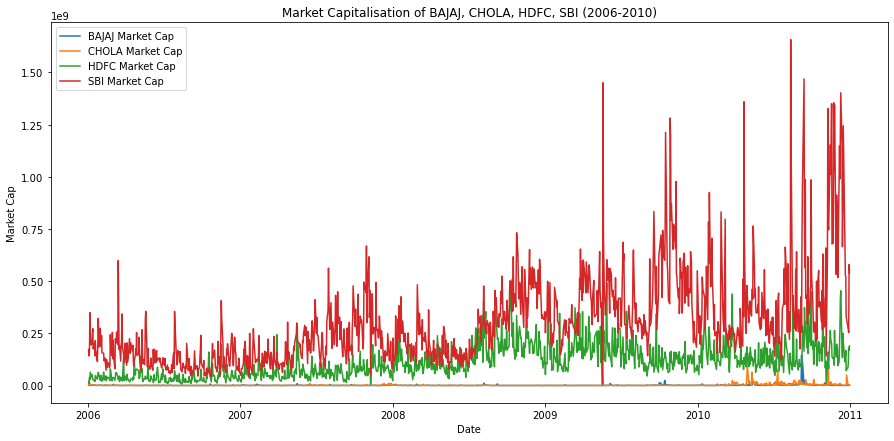

In [60]:
plt.figure(figsize = (15,7))
bajaj['Total Traded'].plot(label = 'BAJAJ Market Cap')
chola['Total Traded'].plot(label = 'CHOLA Market Cap')
hdfc['Total Traded'].plot(label = 'HDFC Market Cap')
sbi['Total Traded'].plot(label = 'SBI Market Cap')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Capitalisation of BAJAJ, CHOLA, HDFC, SBI (2006-2010)')

In [61]:
sbi.iloc[[sbi['Total Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2010-08-12,258.99,279.5,257.63,278.44,6400219,1.657593e+09


In [62]:
from pandas.plotting import scatter_matrix

In [63]:
finance = pd.concat([bajaj['Open'], chola['Open'], hdfc['Open'], sbi['Open']], axis = 1)
finance.columns = ['BAJAJ Open', 'CHOLA Open', 'HDFC Open', 'SBI Open']

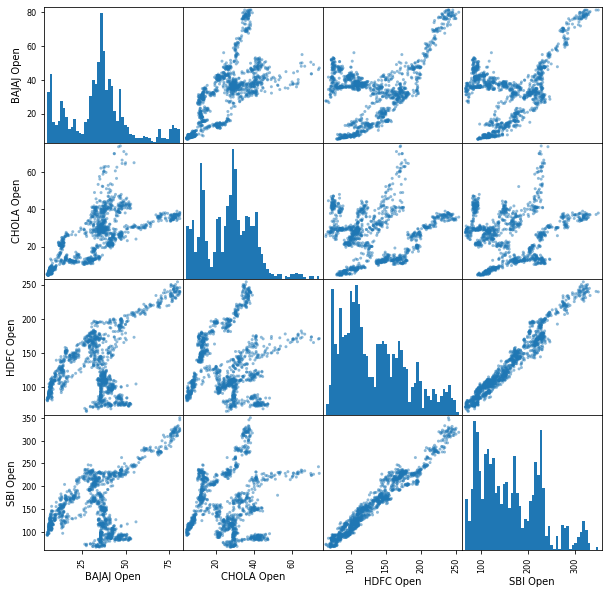

In [64]:
scatter_matrix(finance, figsize = (10, 10), hist_kwds={'bins':50})
plt.show()

In [65]:
bajaj['returns'] = (bajaj['Close']/bajaj['Close'].shift(1)) - 1
chola['returns'] = (chola['Close']/chola['Close'].shift(1)) - 1
hdfc['returns'] = (hdfc['Close']/hdfc['Close'].shift(1)) - 1
sbi['returns'] = (sbi['Close']/sbi['Close'].shift(1)) - 1

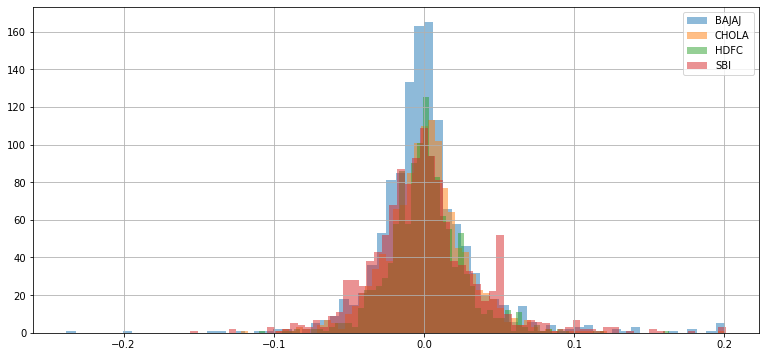

In [66]:
bajaj['returns'].hist(bins = 70, label = 'BAJAJ', alpha = 0.5, figsize = (13, 6))
sbi['returns'].hist(bins = 70, label = 'CHOLA', alpha = 0.5)
hdfc['returns'].hist(bins = 70, label = 'HDFC', alpha = 0.5)
chola['returns'].hist(bins = 70, label = 'SBI', alpha = 0.5)
plt.legend()

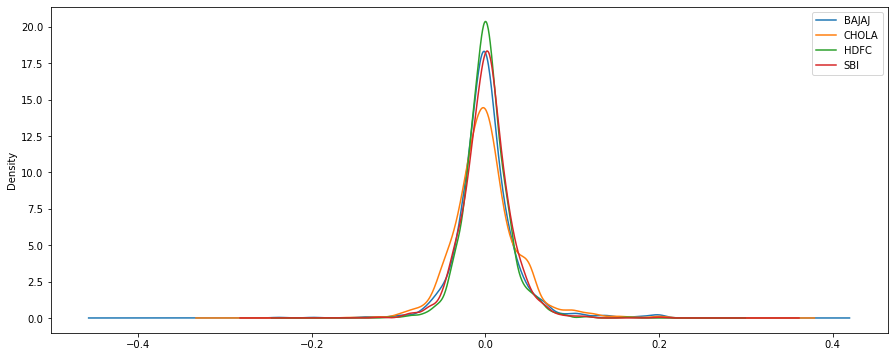

In [67]:
bajaj['returns'].plot(kind='kde', label = 'BAJAJ', figsize = (15, 6))
chola['returns'].plot(kind='kde', label = 'CHOLA')
hdfc['returns'].plot(kind='kde', label = 'HDFC')
sbi['returns'].plot(kind='kde', label = 'SBI')
plt.legend()

<AxesSubplot:>

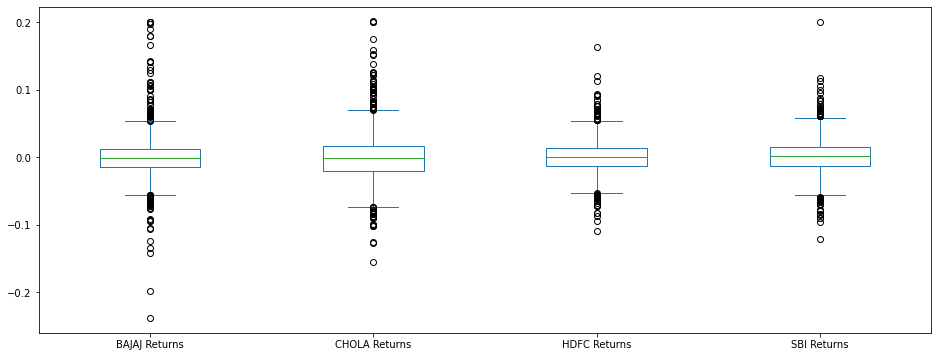

In [68]:
box_df =  pd.concat([bajaj['returns'], chola['returns'], hdfc['returns'], sbi['returns']], axis = 1)
box_df.columns = ['BAJAJ Returns', 'CHOLA Returns', 'HDFC Returns', 'SBI Returns']
box_df.plot(kind = 'box', figsize = (16,6))

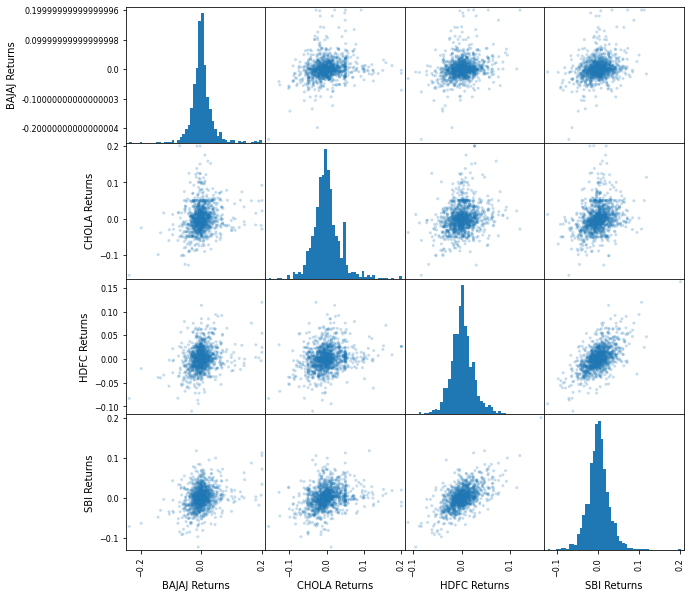

In [69]:
scatter_matrix(box_df, figsize = (10, 10), hist_kwds={'bins':50}, alpha = 0.25)
plt.show()

In [70]:
bajaj['cumulative_returns'] = (1 + bajaj['returns']).cumprod()
chola['cumulative_returns'] = (1 + chola['returns']).cumprod()
hdfc['cumulative_returns'] = (1 + hdfc['returns']).cumprod()
sbi['cumulative_returns'] = (1 + sbi['returns']).cumprod()

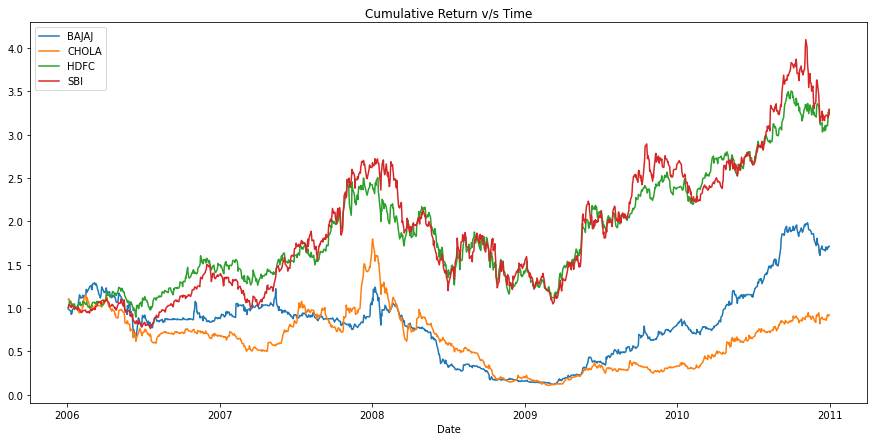

In [71]:
bajaj['cumulative_returns'].plot(label='BAJAJ', figsize = (15, 7))
chola['cumulative_returns'].plot(label='CHOLA')
hdfc['cumulative_returns'].plot(label='HDFC')
sbi['cumulative_returns'].plot(label='SBI')
plt.title('Cumulative Return v/s Time')
plt.legend()
plt.show()

### American Companies

In [72]:
bac = pd.read_csv("BAC-2006-2010 - Sheet1.csv")
citi = pd.read_csv("Citi-2006-2010 - Sheet1.csv")
gs = pd.read_csv("GS-2006-2010 - Sheet1.csv")
jpm = pd.read_csv("JPM-2006-2010 - Sheet1.csv")

In [73]:
bac['Date'] = pd.to_datetime(bac['Date'], infer_datetime_format=True)
bac['Date'] = pd.to_datetime(bac['Date']).dt.date
citi['Date'] = pd.to_datetime(citi['Date'], infer_datetime_format=True)
citi['Date'] = pd.to_datetime(citi['Date']).dt.date
gs['Date'] = pd.to_datetime(gs['Date'], infer_datetime_format=True)
gs['Date'] = pd.to_datetime(gs['Date']).dt.date
jpm['Date'] = pd.to_datetime(jpm['Date'], infer_datetime_format=True)
jpm['Date'] = pd.to_datetime(jpm['Date']).dt.date

In [74]:
bac = bac.set_index('Date')
citi = citi.set_index('Date')
gs = gs.set_index('Date')
jpm = jpm.set_index('Date')


In [75]:
bac.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.56,46.97,46.36,46.60,15620000


In [76]:
citi.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,490.0,493.8,481.1,492.9,15376600
2006-01-04,488.6,491.0,483.5,483.8,18710200
2006-01-05,484.4,487.8,484.0,486.2,11431600
2006-01-06,488.8,489.0,482.0,486.2,13702500
2006-01-09,486.0,487.4,483.0,483.9,16807400


In [77]:
gs.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,126.70,129.44,124.23,128.87,6188700
2006-01-04,127.35,128.91,126.38,127.09,4862000
2006-01-05,125.65,127.32,125.61,127.04,3717600
2006-01-06,127.29,129.25,127.29,128.84,4319600
2006-01-09,128.83,130.62,128.00,130.39,4723500


In [78]:
jpm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.83,40.36,39.30,40.19,12839400
2006-01-04,39.78,40.14,39.42,39.62,11836800
2006-01-05,39.61,39.81,39.50,39.74,8109400
2006-01-06,39.92,40.24,39.55,40.02,7966900
2006-01-09,39.88,40.72,39.88,40.67,16575200


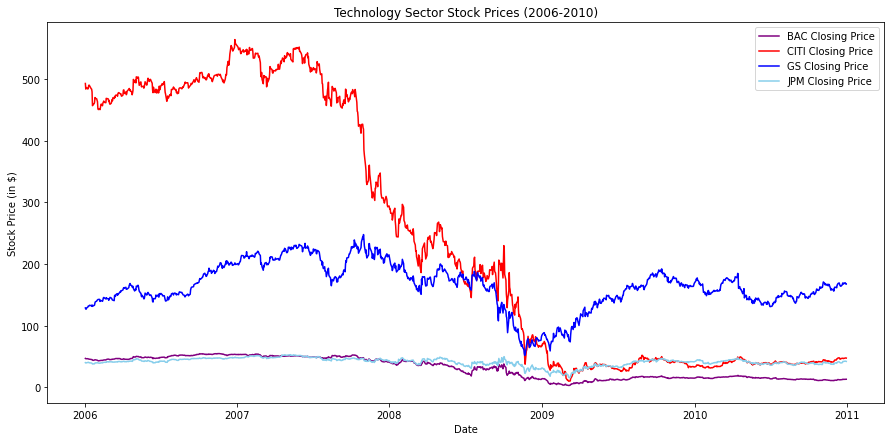

In [79]:
plt.figure(figsize=(15,7))
bac['Close'].plot(label='BAC Closing Price', color = 'purple')
citi['Close'].plot(label='CITI Closing Price', color = 'red')
gs['Close'].plot(label='GS Closing Price', color = 'blue')
jpm['Close'].plot(label='JPM Closing Price', color ='skyblue')
plt.title("Technology Sector Stock Prices (2006-2010)")
plt.xlabel("Date")
plt.ylabel("Stock Price (in $)")
plt.legend()

Text(0, 0.5, 'Volume Traded')

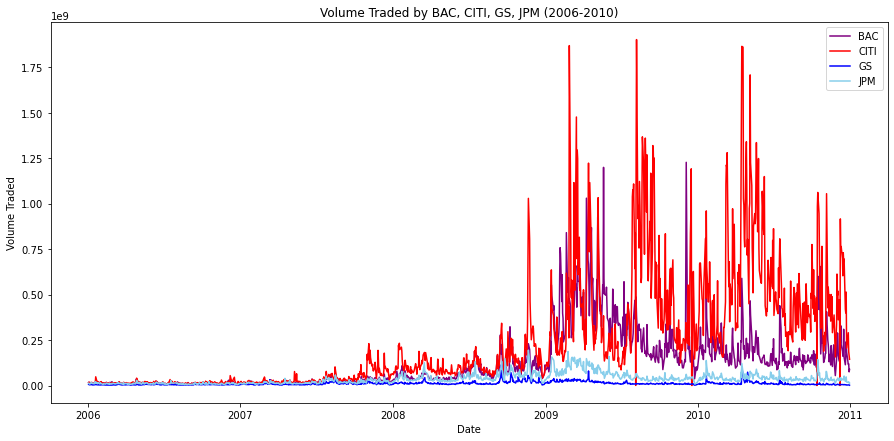

In [80]:
plt.figure(figsize=(15,7))
bac['Volume'].plot(label='BAC', color = 'purple')
citi['Volume'].plot(label='CITI', color = 'red')
gs['Volume'].plot(label='GS', color = 'blue')
jpm['Volume'].plot(label='JPM', color ='skyblue')
plt.title("Volume Traded by BAC, CITI, GS, JPM (2006-2010)")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume Traded')

In [81]:
citi.iloc[[citi['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-08-07,39.8,42.4,38.3,38.5,1901421568


In [82]:
bac.iloc[[bac['Volume'].argmax()]]


,Open,High,Low,Close,Volume
Date,,,,,
2009-12-04,15.76,16.4,15.62,16.28,1226791296


In [83]:
bac['Total Traded'] = bac['Open'] * bac['Volume']
citi['Total Traded'] = citi['Open'] * citi['Volume']
gs['Total Traded'] = gs['Open'] * gs['Volume']
jpm['Total Traded'] = jpm['Open'] * jpm['Volume']

Text(0.5, 1.0, 'Market Capitalisation of bac, citi, gs, jpm(2006-2010)')

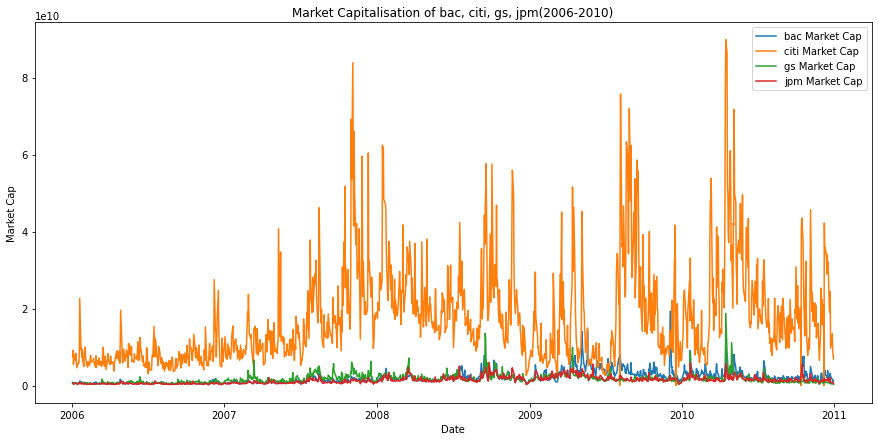

In [84]:
plt.figure(figsize = (15,7))
bac['Total Traded'].plot(label = 'bac Market Cap')
citi['Total Traded'].plot(label = 'citi Market Cap')
gs['Total Traded'].plot(label = 'gs Market Cap')
jpm['Total Traded'].plot(label = 'jpm Market Cap')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Capitalisation of bac, citi, gs, jpm(2006-2010)')

In [85]:
jpm.iloc[[jpm['Total Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2008-09-26,40.55,49.0,40.48,48.24,148081392,6.004700e+09


In [86]:
from pandas.plotting import scatter_matrix

In [89]:
financeA = pd.concat([bac['Open'], citi['Open'],gs['Open'], jpm['Open']], axis = 1)
financeA.columns = ['BAC Open', 'CITI Open', 'GS Open', 'JPM Open']

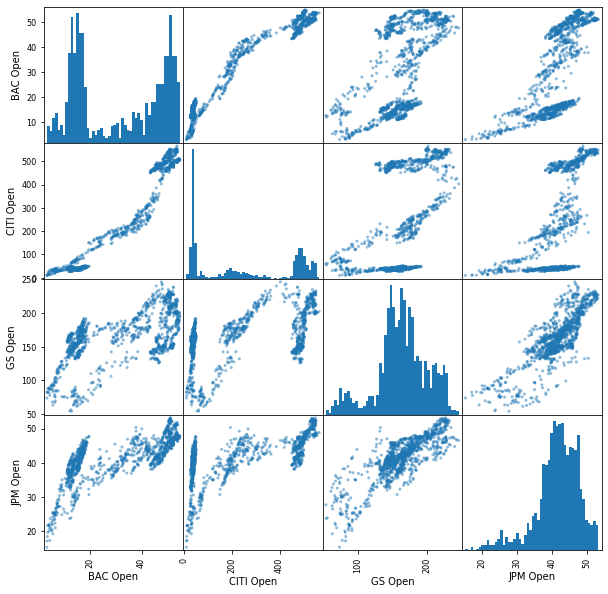

In [90]:
scatter_matrix(financeA, figsize = (10, 10), hist_kwds={'bins':50})
plt.show()

In [91]:
bac['returns'] = (bac['Close']/bac['Close'].shift(1)) - 1
citi['returns'] = (citi['Close']/citi['Close'].shift(1)) - 1
gs['returns'] = (gs['Close']/gs['Close'].shift(1)) - 1
jpm['returns'] = (jpm['Close']/jpm['Close'].shift(1)) - 1

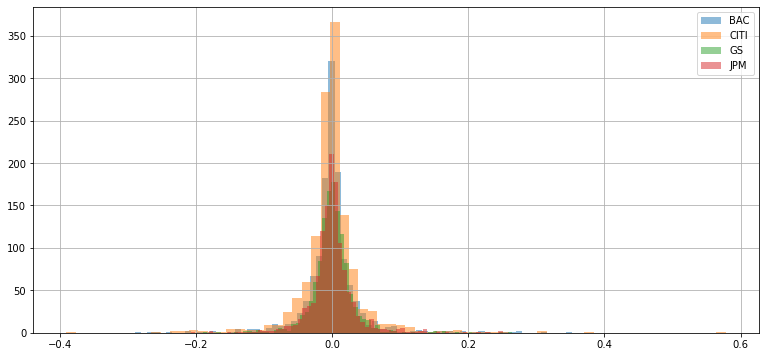

In [92]:
bac['returns'].hist(bins = 70, label = 'BAC', alpha = 0.5, figsize = (13, 6))
citi['returns'].hist(bins = 70, label = 'CITI', alpha = 0.5)
gs['returns'].hist(bins = 70, label = 'GS', alpha = 0.5)
jpm['returns'].hist(bins = 70, label = 'JPM', alpha = 0.5)
plt.legend()


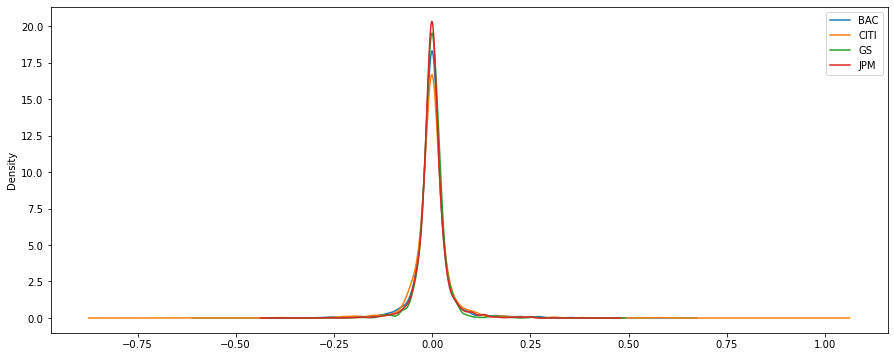

In [93]:
bac['returns'].plot(kind='kde', label = 'BAC', figsize = (15, 6))
citi['returns'].plot(kind='kde', label = 'CITI')
gs['returns'].plot(kind='kde', label = 'GS')
jpm['returns'].plot(kind='kde', label = 'JPM')
plt.legend()

<AxesSubplot:>

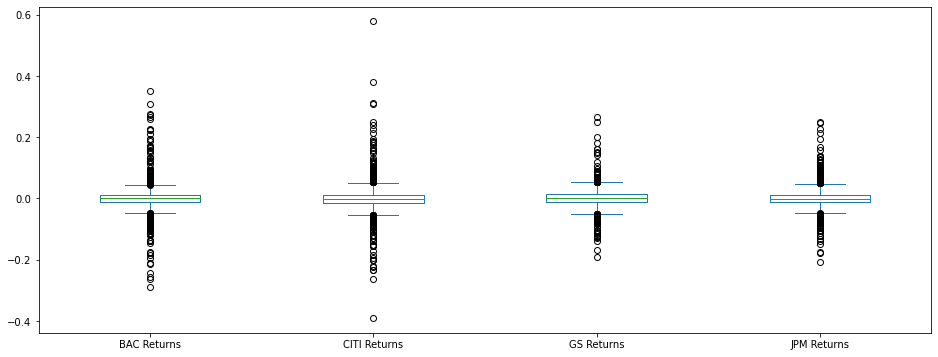

In [94]:
boxA_df = pd.concat([bac['returns'], citi['returns'], gs['returns'], jpm['returns']], axis=1)
boxA_df.columns = ['BAC Returns', 'CITI Returns', 'GS Returns', 'JPM Returns']
boxA_df.plot(kind = 'box', figsize = (16,6))


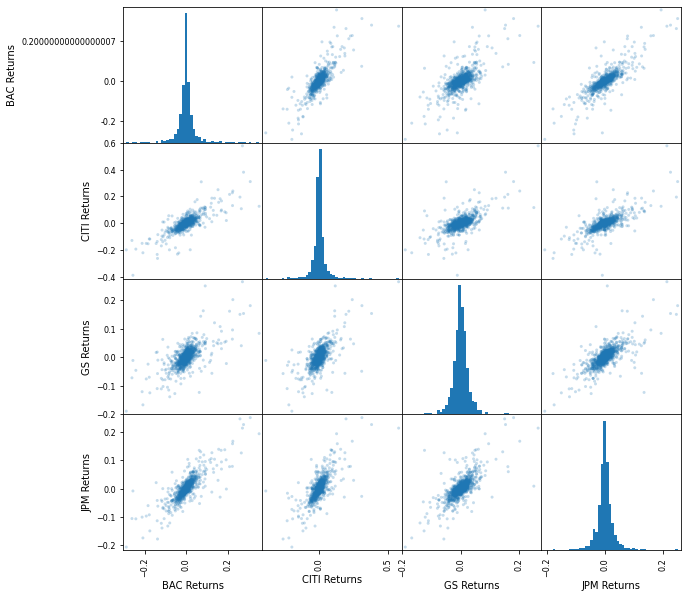

In [95]:
scatter_matrix(boxA_df, figsize = (10, 10), hist_kwds={'bins':50}, alpha = 0.25)
plt.show()

In [96]:
bac['cumulative_returns'] = (1 + bac['returns']).cumprod()
citi['cumulative_returns'] = (1 + citi['returns']).cumprod()
gs['cumulative_returns'] = (1 + gs['returns']).cumprod()
jpm['cumulative_returns'] = (1 + jpm['returns']).cumprod()


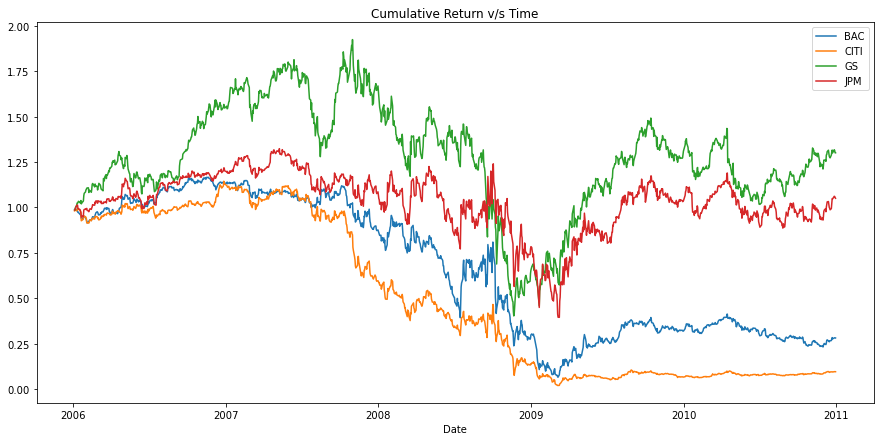

In [97]:
bac['cumulative_returns'].plot(label='BAC', figsize = (15, 7))
citi['cumulative_returns'].plot(label='CITI')
gs['cumulative_returns'].plot(label='GS')
jpm['cumulative_returns'].plot(label='JPM')
plt.title('Cumulative Return v/s Time')
plt.legend()
plt.show()